# harr

In [19]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

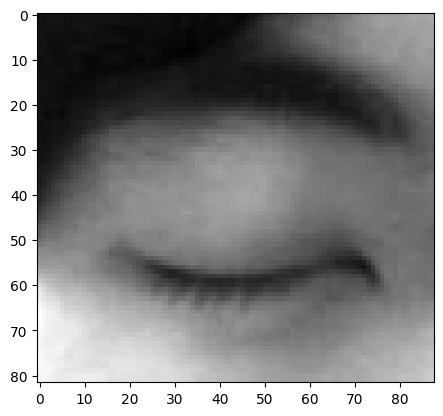

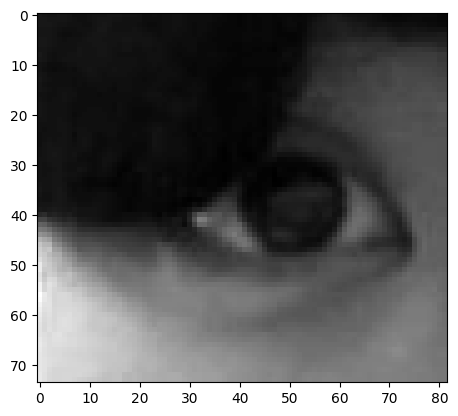

In [69]:
Datadirectory = 'Harr_dataset/archive5/train'
Classes = ['Closed_Eyes', 'Open_Eyes']
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break

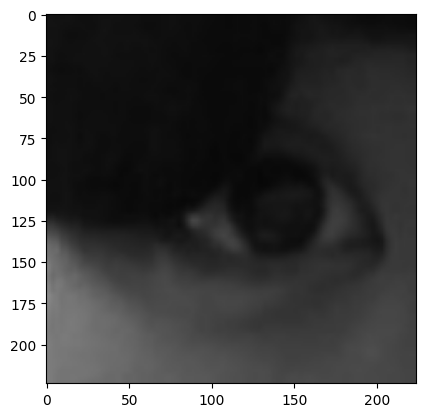

In [70]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [71]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [72]:
create_training_data()

In [73]:
print(len(training_data))

3646


In [74]:
random.shuffle(training_data)

In [75]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [76]:
X = X/255.0
Y = np.array(y)

In [78]:
model = tf.keras.applications.mobilenet.MobileNet()

In [79]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [80]:
base_input = model.layers[0].input

In [81]:
base_output = model.layers[-4].output

In [82]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [83]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [84]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [85]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [86]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.1)

Epoch 1/2
103/103 [==============================] - 374s 3s/step - loss: 0.0221 - accuracy: 0.9918 - val_loss: 0.0289 - val_accuracy: 0.9973
Epoch 2/2
103/103 [==============================] - 442s 4s/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0464 - val_accuracy: 0.9973


In [87]:
new_model.save('Harr_dataset/cnn_model/harr_model.h5')

In [88]:
new_model = tf.keras.models.load_model('Harr_dataset/cnn_model/harr_model.h5')

In [89]:
img_array = cv2.imread('Harr_dataset/archive5/train/Closed_Eyes/0.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [90]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

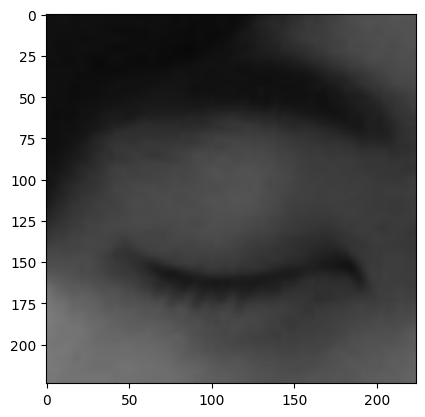

In [91]:
plt.imshow(new_array)

In [92]:
X_input = X_input/255.0

In [93]:
prediction = new_model.predict(X_input)
prediction

1/1 [==============================] - 2s 2s/step


array([[9.101436e-13]], dtype=float32)

In [192]:
img = cv2.imread('Harr_dataset/test_img/open4.jpg')

In [193]:
# haarcascade 불러오기
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [194]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [195]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [196]:
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

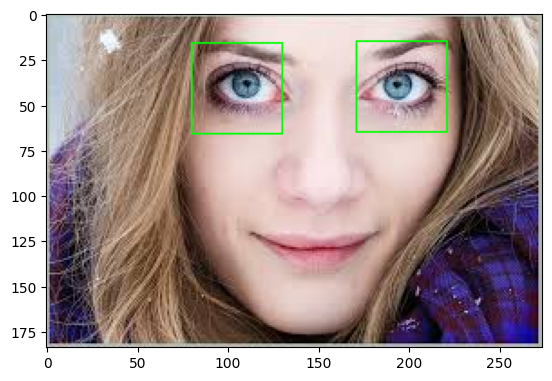

In [197]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [198]:
eyeCascade = cv2.CascadeClassifier('haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes not detected")
    else:
        for ex, ey, ew, eh in eyess :
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

In [199]:
eyes_roi

array([[[212, 216, 234],
        [207, 209, 227],
        [200, 202, 220],
        ...,
        [217, 218, 239],
        [213, 214, 235],
        [207, 209, 233]],

       [[200, 204, 222],
        [203, 205, 223],
        [201, 203, 221],
        ...,
        [215, 216, 236],
        [207, 208, 228],
        [204, 207, 228]],

       [[189, 193, 211],
        [200, 202, 220],
        [205, 207, 225],
        ...,
        [218, 218, 236],
        [207, 208, 228],
        [203, 204, 225]],

       ...,

       [[197, 198, 219],
        [197, 198, 219],
        [187, 187, 211],
        ...,
        [156, 156, 186],
        [171, 173, 203],
        [168, 170, 201]],

       [[192, 193, 214],
        [190, 193, 214],
        [192, 192, 216],
        ...,
        [165, 167, 197],
        [171, 173, 203],
        [170, 173, 204]],

       [[191, 194, 215],
        [191, 194, 215],
        [193, 194, 215],
        ...,
        [174, 176, 206],
        [177, 181, 210],
        [175, 180, 211]]

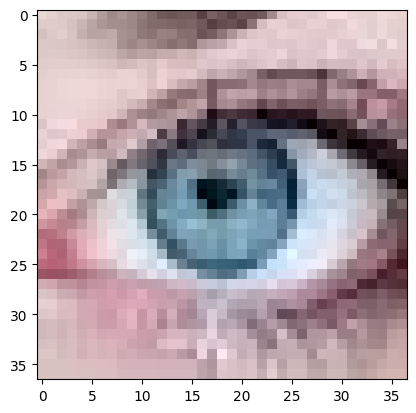

In [200]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [201]:
eyes_roi.shape

(37, 37, 3)

In [202]:
final_img = cv2.resize(eyes_roi, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [203]:
new_model.predict(final_img)

1/1 [==============================] - 0s 158ms/step


array([[1.]], dtype=float32)